In [2]:
# Exercício 7 da Ficha 3
# Implementação do CLogDKPd-MGB, CLogDKPd-MGmB e CLogDKPd-MGE aos slides 252
# Falta fazer o Kernel, pois foi feito apenas o método Dual!
import numpy as np
import matplotlib.pyplot as plt
import time


In [188]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cLogDKPd(x, y, Pd = 1, maxIter = 1000, batch=0, eta=0.5, type=2): #type: 0 sequencial sem shuffle, 1 shuffle, 2 aleatorio 
    global xorig
    N = len(x)
    x = x.T
    linha_de_uns = np.ones((1, x.shape[1]))
    x = np.vstack((linha_de_uns, x))
    xorig = x 
    alfa = np.zeros(N, dtype=float)
    #alfa = np.array(range(-N,0), dtype=float)
    A = [alfa]
    E = [None]
    t = 0
    if batch == 0:
        batch = N

    quantBatches = N//batch
    while t < maxIter:
        if type ==  2: # sorteio aleatório do batch
            sel = np.random.choice(N, size=batch, replace=False)
        else: # percorre o próximo minibatch da permuta inicial 
            if (t % quantBatches) == 0: # precisa permutar a lista novamente?
                shufSel = np.arange(N)
                if type == 1: #pediu para fazer permutacao
                    np.random.shuffle(shufSel)
                # deixa a lista de indices de um tamanho múltiplo de batch = Descartar últimos elementos que não forma um batch completo
                shufSel = shufSel[:((quantBatches)*batch)]
                shufSel = shufSel.reshape(-1, batch)
            sel = shufSel[(t % quantBatches)]
            
        xs = x[:,sel]
        ys = y[sel]

        #pp = sigmoid(np.sum(alfa.reshape(N, 1) * np.power(np.matmul(x.T, xs), Pd), axis=0))
        pp = sigmoid(np.sum(alfa * np.power(np.matmul(x.T, xs).T, Pd), axis=1))
        if Pd == 1: validar("A", pp, sigmoid(np.sum(np.matmul((alfa * x).T, xs), axis=0)))
            
        d = np.matmul((pp - ys), np.power(np.matmul(x.T, xs).T, Pd)) / len(pp)
        alfa = alfa - eta * d
        A.append(alfa)
        t = t + 1

        pp = sigmoid(np.sum(alfa * np.power(np.matmul(x.T, x).T, Pd), axis=1))
        if Pd == 1: validar("B", pp, sigmoid(np.sum(np.matmul((alfa * x).T, x), axis=0)))
        nE = np.sum( -(y * np.log(pp)) - ((1-y) * np.log(1-pp)) )  / N
        E.append(nE)
        #print(f"t={t} w({A})={alfa} E({t})={nE}")

    return (alfa, E)

In [199]:
def cLogDKPdPredict(x, a, Pd):
    x = x.T
    linha_de_uns = np.ones((1, x.shape[1]))
    x = np.vstack((linha_de_uns, x))
    pp = sigmoid(np.sum(a * np.power(np.matmul(xorig.T, x).T, Pd), axis=1))
    if Pd == 1: validar("C", pp, sigmoid(np.sum(np.matmul((a * xorig).T, x), axis=0)))
    return pp

def cLogDKPdPredictXY(xx, yy, a, Pd):
    x = np.column_stack((xx.ravel(), yy.ravel()))
    return cLogDKPdPredict(x, a, Pd)
    
def fazPlot(a, title, Pd):
    pp = cLogDKPdPredictXY(xx, yy, a, Pd)
    zz = pp.reshape(20, 20)
    # Plotar a região de decisão
    plt.contourf(xx, yy, zz, levels=[-0.1, 0.5, 1.1], colors=['blue', 'red'], alpha=0.3)
    
    # Adicionar contorno da fronteira de decisão
    plt.contour(xx, yy, zz, levels=[0.5], colors='black', linewidths=1)
    
    # Plotar os pontos reais
    plt.scatter(x0[:, 0], x0[:, 1], color='blue', label='y = 0')
    plt.scatter(x1[:, 0], x1[:, 1], color='red', label='y = 1')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Zonas de Classes do cLogDKPd{Pd}-{title}')
    plt.legend()
    plt.axis('equal')
    plt.show()

def fazPlotError(E, title, Pd):
    # Plota a curva
    plt.plot(E, color='red', label='Erro')
    plt.title(f'Evolução do Erro do cLogDKPd{Pd}-{title}')
    plt.xlabel('t')
    plt.ylabel('E')
    plt.grid(False)
    plt.legend()
    plt.show()

def calculaAcc(x, y, a, Pd):
    pp = cLogDKPdPredict(x, a, Pd)
    return np.sum(np.round(pp) == y) / len(y)
    
def validar(etapa, pp, ppp): #função que foi útil para depuração
    if np.any(ppp.shape != pp.shape) or np.any(ppp != pp) > 0:
        if np.any(ppp.shape != pp.shape) or np.sum(np.abs(ppp - pp)) > 1e-10:
            print(etapa + " pp, ppp:", pp.shape, pp.shape)
            print(etapa + " pp, ppp:", pp, ppp) 

Alfa* = [-13.52701054   8.70396299   8.70396299  -6.64954506].T,  E = 0.03757781879992377, acc = 1.0


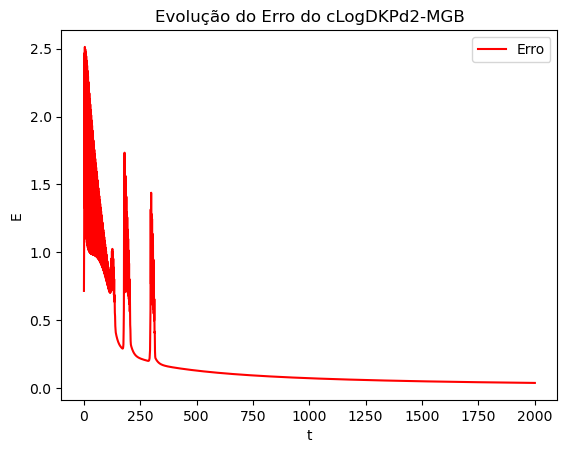

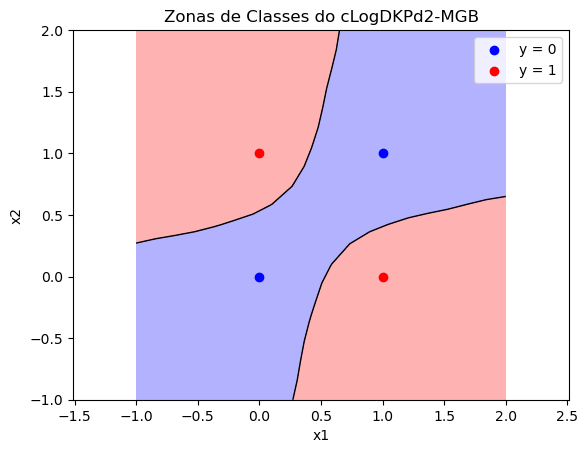

Alfa* = [-14.02652176   9.19041838   9.32011571  -7.27126535].T,  E = 0.037087427354708144, acc = 1.0


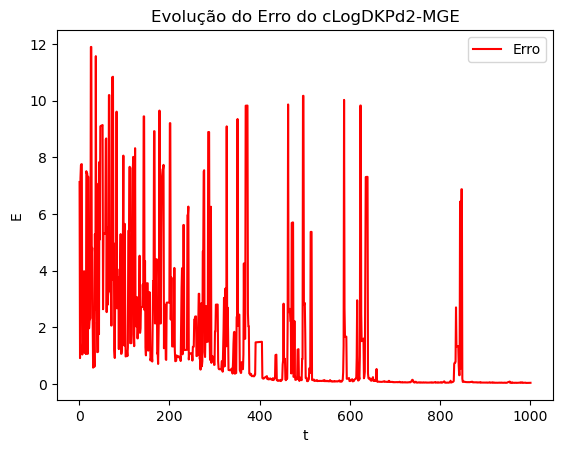

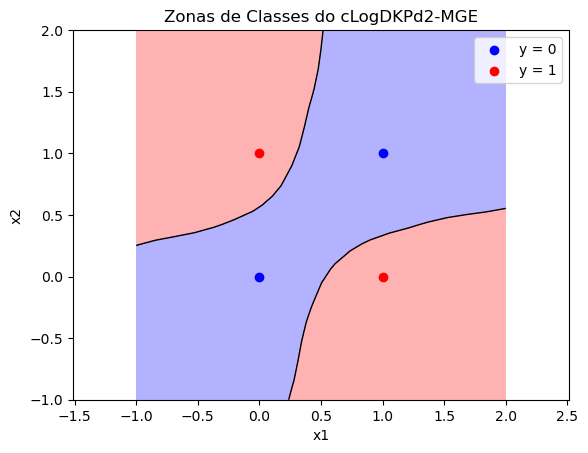

Alfa* = [-14.10105545   9.37559148   9.29789929  -7.12071437].T,  E = 0.03458667452362951, acc = 1.0


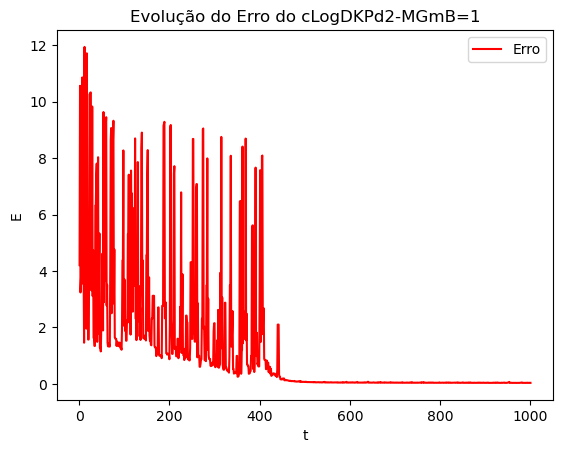

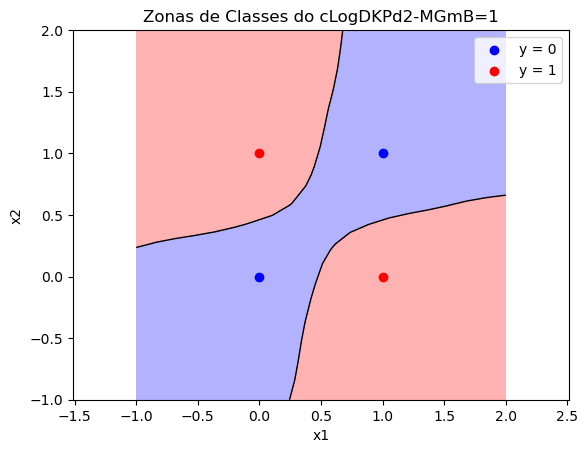

Alfa* = [-12.15644215   8.04454772   8.00690305  -6.21301744].T,  E = 0.05028654347891479, acc = 1.0


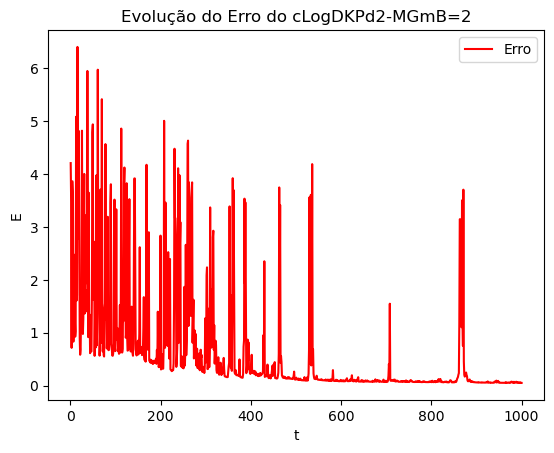

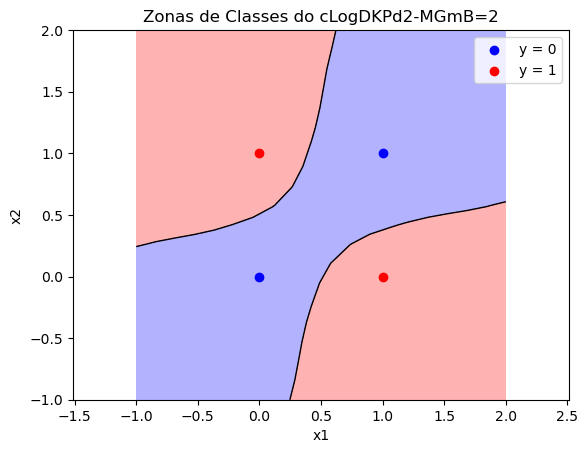

In [200]:
y = np.array([0, 0, 0, 1]) #AND
x = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y = np.array([0, 1, 1, 0]) #XOR
x = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
#y = np.array([0, 1, 1, 0, 1])
#x = np.array([(-0.5, 0.5), (0.5, 0.5), (1., 0.5), (-1., -0.5), (0.5, -0.5)])
x0 = x[y <= 0.5]  # pontos com y=0
x1 = x[y > 0.5]  # pontos com y=1

#xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 20), np.linspace(-0.1, 1.1, 20))
dxy = 0.1*10
xx, yy = np.meshgrid(np.linspace(-dxy + np.min(x[:,0]), dxy + np.max(x[:,0]), 20), np.linspace(-dxy + np.min(x[:,0]), dxy + np.max(x[:,0]), 20))

vPd = 2 #grau do  polinomio do kernel
if True:
    #MGB
    alfa, E = cLogDKPd(x, y, maxIter = 2000, type=0, Pd = vPd)
    print(f"Alfa* = {alfa}.T,  E = {E[-1]}, acc = {calculaAcc(x, y, alfa, Pd = vPd)}")
    fazPlotError(E, "MGB", vPd)
    fazPlot(alfa, "MGB", vPd)

if True:
    #MGE (minibatch = 1)
    alfa, E = cLogDKPd(x, y, batch=1, Pd = vPd)
    print(f"Alfa* = {alfa}.T,  E = {E[-1]}, acc = {calculaAcc(x, y, alfa, Pd = vPd)}")
    fazPlotError(E, "MGE", vPd)
    fazPlot(alfa, "MGE", vPd)
    
if True:
    #MGBmB sequential de minibatch = 1
    alfa, E = cLogDKPd(x, y, batch=1, type=1, Pd = vPd)
    print(f"Alfa* = {alfa}.T,  E = {E[-1]}, acc = {calculaAcc(x, y, alfa, Pd = vPd)}")
    fazPlotError(E, "MGmB=1", vPd)
    fazPlot(alfa, "MGmB=1", vPd)
    
if True:
    #MGBmB sequential de minibatch = 2
    alfa, E = cLogDKPd(x, y, batch=2, Pd = vPd)
    print(f"Alfa* = {alfa}.T,  E = {E[-1]}, acc = {calculaAcc(x, y, alfa, Pd = vPd)}")
    fazPlotError(E, "MGmB=2", vPd)
    fazPlot(alfa, "MGmB=2", vPd)